# **Analisis Faktor-faktor yang Memengaruhi Penggunaan Diskon pada Platform E-Commerce berdasarkan Customer Behavior Menggunakan Model Regresi Probit**

Elza Hiya Nadhifa/ 3323600040

# **Import Library**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')


In [119]:
df = pd.read_csv('Ecommerce_Consumer_Behavior_Analysis_Data.csv')
df

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20-562-2569,44,Female,High,Divorced,Bachelor's,High,Aramayuan,Mobile Accessories,$463.67,...,4,NaN,Tablet,PayPal,7/7/2024,True,False,Need-based,Standard,5
996,41-366-4205,50,Female,High,Single,High School,Middle,Paquera,Gardening & Outdoors,$69.78,...,6,Low,Tablet,Cash,3/28/2024,True,False,Wants-based,No Preference,9
997,77-241-7621,26,Male,High,Married,Bachelor's,High,Warudoyong,Food & Beverages,$453.37,...,6,High,Desktop,Credit Card,3/11/2024,True,True,Wants-based,Express,9
998,53-091-2176,21,Female,High,Widowed,Bachelor's,Middle,Béziers,Baby Products,$106.15,...,5,Medium,Desktop,Cash,3/30/2024,True,True,Impulsive,Standard,8


# **EDA**

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [121]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### **Distribusi Umur**

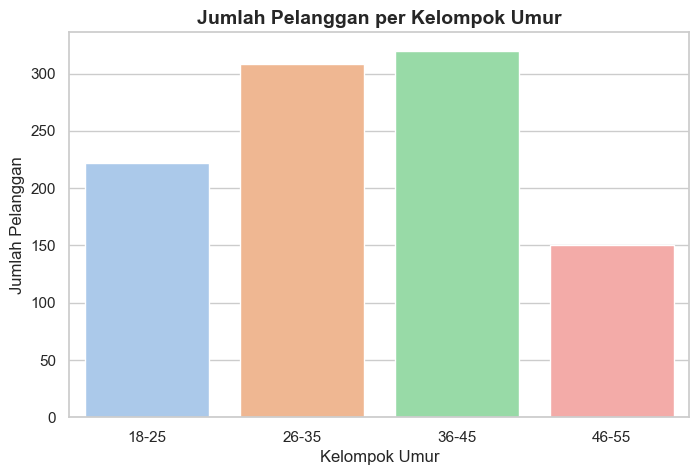

In [122]:
# buat kategori umur
bins = [17, 25, 35, 45, 55]
labels = ['18-25','26-35','36-45','46-55']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age_Group', palette='pastel')
plt.title("Jumlah Pelanggan per Kelompok Umur", fontsize=14, fontweight='bold')
plt.xlabel("Kelompok Umur")
plt.ylabel("Jumlah Pelanggan")
plt.show()


## **Jumlah Customer per Kelompok Umur berdasarkan Discount Used**

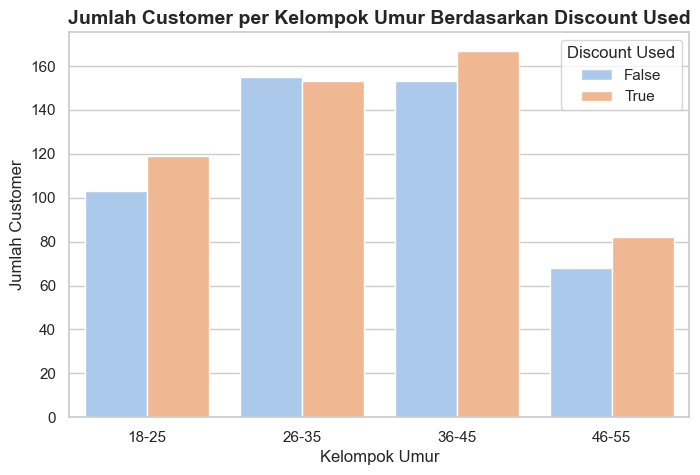

In [123]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age_Group', hue='Discount_Used', palette='pastel')
plt.title("Jumlah Customer per Kelompok Umur Berdasarkan Discount Used", fontsize=14, fontweight='bold')
plt.xlabel("Kelompok Umur")
plt.ylabel("Jumlah Customer")
plt.legend(title='Discount Used')
plt.show()


## **Proporsi Gender Berdasarkan Discount Used**

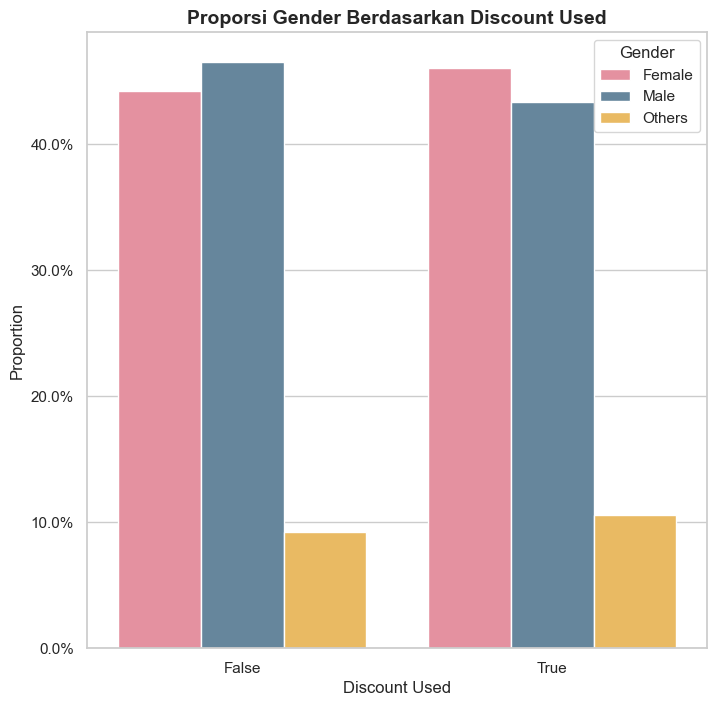

In [124]:
# kategorisasi gender
df['Gender'] = df['Gender'].map({'Male':'Male', 'Female':'Female'}).fillna('Others')

# hitung proporsi dengan as_index=False
gender_counts = df.groupby(['Discount_Used','Gender'], as_index=False).size()
gender_counts.rename(columns={'size':'count'}, inplace=True)
# proporsi per level Discount_Used
gender_counts['prop'] = gender_counts.groupby('Discount_Used')['count'].transform(lambda x: x / x.sum())

plt.figure(figsize=(8,8))
sns.barplot(
    data=gender_counts, 
    x='Discount_Used', 
    y='prop', 
    hue='Gender',
    palette={"Male":"#5d88a5","Female":"#f28397","Others":"#ffc14d"}
)
plt.ylabel("Proportion")
plt.xlabel("Discount Used")
plt.title("Proporsi Gender Berdasarkan Discount Used", fontsize=14, fontweight='bold')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))
plt.legend(title='Gender')
plt.show()



### **Jumlah Customer per Discount Used Berdasarkan Education Level**

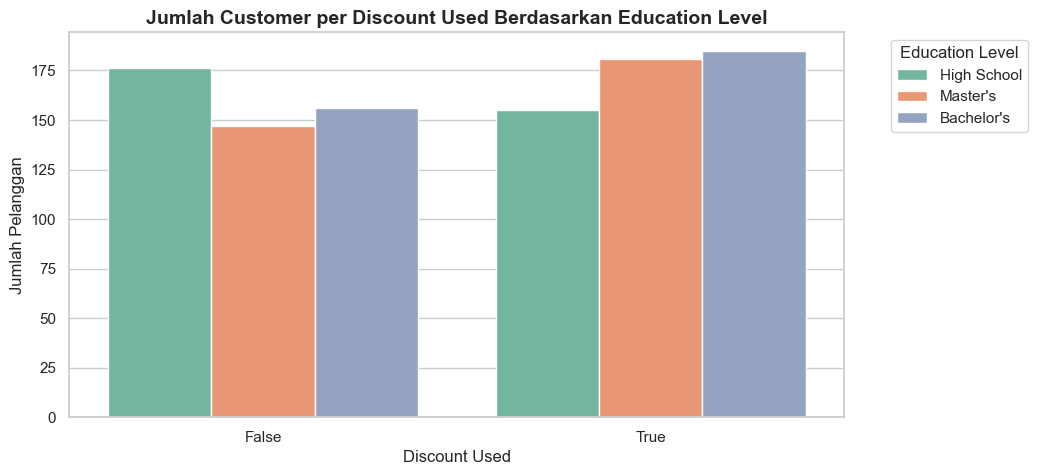

In [125]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Discount_Used', hue='Education_Level', palette='Set2')
plt.title("Jumlah Customer per Discount Used Berdasarkan Education Level", fontsize=14, fontweight='bold')
plt.xlabel("Discount Used")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Discount Used Cek**

In [126]:
df['Discount_Used'].value_counts()

Discount_Used
True     521
False    479
Name: count, dtype: int64

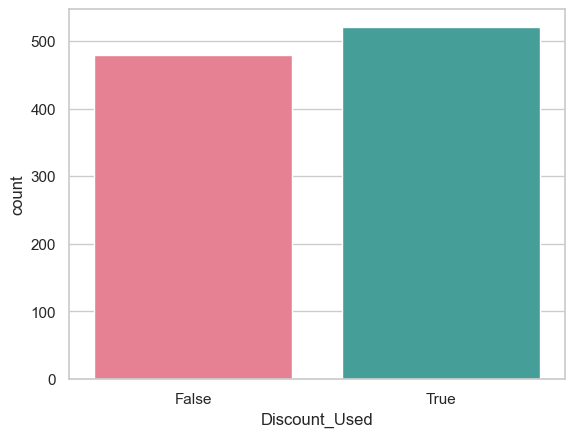

<Figure size 640x480 with 0 Axes>

In [127]:
sns.countplot(x='Discount_Used', data=df, palette='husl')
plt.show()
plt.savefig('count_plot')

# **Drop Columns**

In [128]:
df = df.drop(columns=['Customer_ID','Location','Age_Group', 'Time_of_Purchase'])
df

,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,...,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,22,Female,Middle,Married,Bachelor's,Middle,Gardening & Outdoors,$333.80,4,Mixed,...,1,7,NaN,Tablet,Credit Card,True,False,Need-based,No Preference,2
1,49,Male,High,Married,High School,High,Food & Beverages,$222.22,11,In-Store,...,1,5,High,Tablet,PayPal,True,False,Wants-based,Standard,6
2,24,Female,Middle,Single,Master's,High,Office Supplies,$426.22,2,Mixed,...,1,7,Low,Smartphone,Debit Card,True,True,Impulsive,No Preference,3
3,29,Female,Middle,Single,Master's,Middle,Home Appliances,$101.31,6,Mixed,...,0,1,NaN,Smartphone,Other,True,True,Need-based,Express,10
4,33,Female,Middle,Widowed,High School,Middle,Furniture,$211.70,6,Mixed,...,2,10,NaN,Smartphone,Debit Card,False,False,Wants-based,No Preference,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,Female,High,Divorced,Bachelor's,High,Mobile Accessories,$463.67,5,Online,...,2,4,NaN,Tablet,PayPal,True,False,Need-based,Standard,5
996,50,Female,High,Single,High School,Middle,Gardening & Outdoors,$69.78,9,Mixed,...,0,6,Low,Tablet,Cash,True,False,Wants-based,No Preference,9
997,26,Male,High,Married,Bachelor's,High,Food & Beverages,$453.37,10,Mixed,...,0,6,High,Desktop,Credit Card,True,True,Wants-based,Express,9
998,21,Female,High,Widowed,Bachelor's,Middle,Baby Products,$106.15,12,In-Store,...,0,5,Medium,Desktop,Cash,True,True,Impulsive,Standard,8


# **Pre Processing**

# **Change Data Type to Numeric**

In [129]:
# Hilangkan tanda $ dan ubah ke float
df['Purchase_Amount'] = df['Purchase_Amount'].replace('[\$,]', '', regex=True).astype(float)


# **Handling Missing Value**

In [130]:
# Social Media Influence
df['Social_Media_Influence'] = df.groupby('Device_Used_for_Shopping')['Social_Media_Influence'].transform(
    lambda x: x.fillna(x.mode()[0])
)

# Engagement with Ads
df['Engagement_with_Ads'] = df.groupby('Device_Used_for_Shopping')['Engagement_with_Ads'].transform(
    lambda x: x.fillna(x.mode()[0])
)


jika device sama, maka nilai NaN diisi dengan kategori paling sering muncul di device itu.

In [131]:
df.isnull().sum()

Age                                      0
Gender                                   0
Income_Level                             0
Marital_Status                           0
Education_Level                          0
Occupation                               0
Purchase_Category                        0
Purchase_Amount                          0
Frequency_of_Purchase                    0
Purchase_Channel                         0
Brand_Loyalty                            0
Product_Rating                           0
Time_Spent_on_Product_Research(hours)    0
Social_Media_Influence                   0
Discount_Sensitivity                     0
Return_Rate                              0
Customer_Satisfaction                    0
Engagement_with_Ads                      0
Device_Used_for_Shopping                 0
Payment_Method                           0
Discount_Used                            0
Customer_Loyalty_Program_Member          0
Purchase_Intent                          0
Shipping_Pr

In [132]:
df

,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,...,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,22,Female,Middle,Married,Bachelor's,Middle,Gardening & Outdoors,333.80,4,Mixed,...,1,7,Low,Tablet,Credit Card,True,False,Need-based,No Preference,2
1,49,Male,High,Married,High School,High,Food & Beverages,222.22,11,In-Store,...,1,5,High,Tablet,PayPal,True,False,Wants-based,Standard,6
2,24,Female,Middle,Single,Master's,High,Office Supplies,426.22,2,Mixed,...,1,7,Low,Smartphone,Debit Card,True,True,Impulsive,No Preference,3
3,29,Female,Middle,Single,Master's,Middle,Home Appliances,101.31,6,Mixed,...,0,1,Medium,Smartphone,Other,True,True,Need-based,Express,10
4,33,Female,Middle,Widowed,High School,Middle,Furniture,211.70,6,Mixed,...,2,10,Medium,Smartphone,Debit Card,False,False,Wants-based,No Preference,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,Female,High,Divorced,Bachelor's,High,Mobile Accessories,463.67,5,Online,...,2,4,Low,Tablet,PayPal,True,False,Need-based,Standard,5
996,50,Female,High,Single,High School,Middle,Gardening & Outdoors,69.78,9,Mixed,...,0,6,Low,Tablet,Cash,True,False,Wants-based,No Preference,9
997,26,Male,High,Married,Bachelor's,High,Food & Beverages,453.37,10,Mixed,...,0,6,High,Desktop,Credit Card,True,True,Wants-based,Express,9
998,21,Female,High,Widowed,Bachelor's,Middle,Baby Products,106.15,12,In-Store,...,0,5,Medium,Desktop,Cash,True,True,Impulsive,Standard,8


# **Encoding**

### Binary Encoding

In [133]:
binary_cols = ['Discount_Used', 'Customer_Loyalty_Program_Member']
for col in binary_cols:
    df[col] = df[col].astype(int)

### Ordinal Encoding

In [134]:
ordinal_mappings = {
    'Social_Media_Influence': {'Low':0, 'Medium':1, 'High':2},
    'Engagement_with_Ads': {'Low':0, 'Medium':1, 'High':2},
    'Income_Level': {'Low':0, 'Middle':1, 'High':2},
    'Occupation': {'Low':0, 'Middle':1, 'High':2},
    'Discount_Sensitivity': {'Not Sensitive':0, 'Somewhat Sensitive':1, 'Very Sensitive':2},
    'Education_Level': {'High School':0, "Bachelor's":1, "Master's":2, 'Doctorate':3}
}

for col, mapping in ordinal_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(lambda x: mapping[x] if x in mapping else x)


### Label Encoding

In [135]:
cols_label_encod = ['Gender', 'Marital_Status', 'Purchase_Category', 'Purchase_Channel', 'Device_Used_for_Shopping',
    'Payment_Method', 'Purchase_Intent', 'Shipping_Preference'
]

label_encoders = {}

for col in cols_label_encod:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

df


,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,...,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,22,0,1,1,1,1,9,333.80,4,1,...,1,7,0,2,1,1,0,1,1,2
1,49,1,2,1,0,2,7,222.22,11,0,...,1,5,2,2,4,1,0,3,2,6
2,24,0,1,2,2,2,18,426.22,2,1,...,1,7,0,1,2,1,1,0,1,3
3,29,0,1,2,2,1,13,101.31,6,1,...,0,1,1,1,3,1,1,1,0,10
4,33,0,1,3,0,1,8,211.70,6,1,...,2,10,1,1,2,0,0,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,0,2,0,1,2,17,463.67,5,2,...,2,4,0,2,4,1,0,1,2,5
996,50,0,2,2,0,1,9,69.78,9,1,...,0,6,0,2,0,1,0,3,1,9
997,26,1,2,1,1,2,7,453.37,10,1,...,0,6,2,0,1,1,1,3,0,9
998,21,0,2,3,1,1,2,106.15,12,0,...,0,5,1,0,0,1,1,0,2,8


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    1000 non-null   int64  
 1   Gender                                 1000 non-null   int32  
 2   Income_Level                           1000 non-null   int64  
 3   Marital_Status                         1000 non-null   int32  
 4   Education_Level                        1000 non-null   int64  
 5   Occupation                             1000 non-null   int64  
 6   Purchase_Category                      1000 non-null   int32  
 7   Purchase_Amount                        1000 non-null   float64
 8   Frequency_of_Purchase                  1000 non-null   int64  
 9   Purchase_Channel                       1000 non-null   int32  
 10  Brand_Loyalty                          1000 non-null   int64  
 11  Produ

# **Normalisasi**

In [137]:
# X dan y
X = df.drop(columns=['Discount_Used'])
y = df['Discount_Used']

In [138]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# **Outlier**

### **Cek Outlier**

In [139]:
def check_plot(df, variable):
    # ukuran gambar
    plt.figure(figsize=(16, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

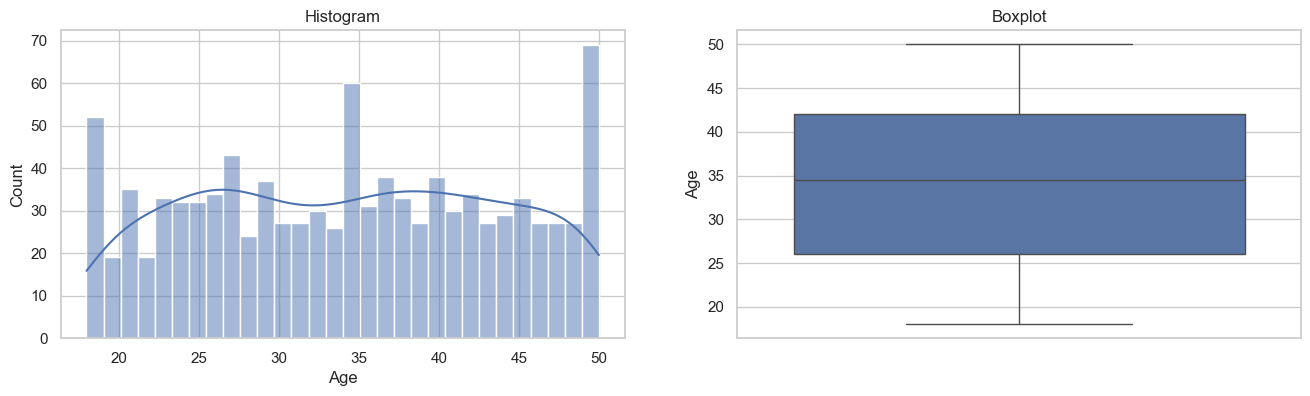

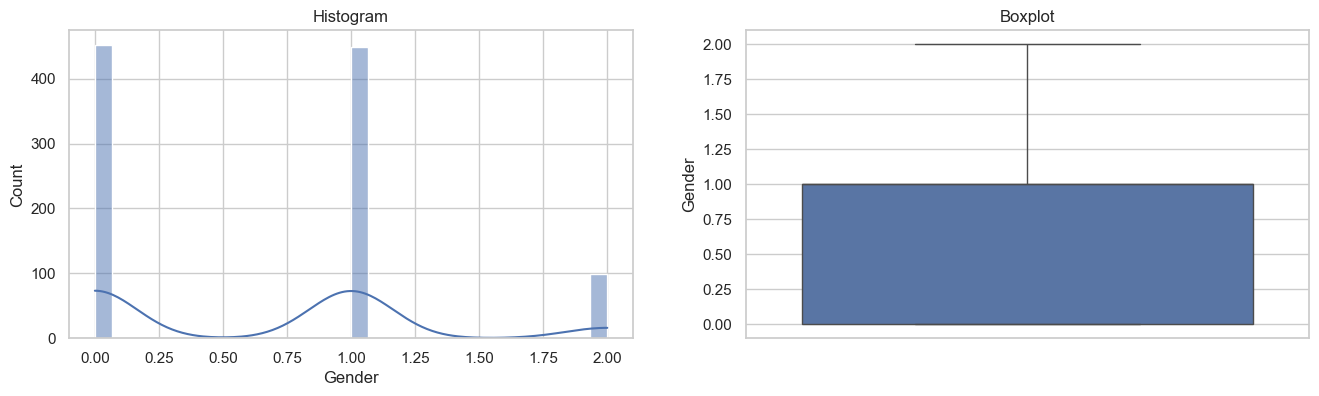

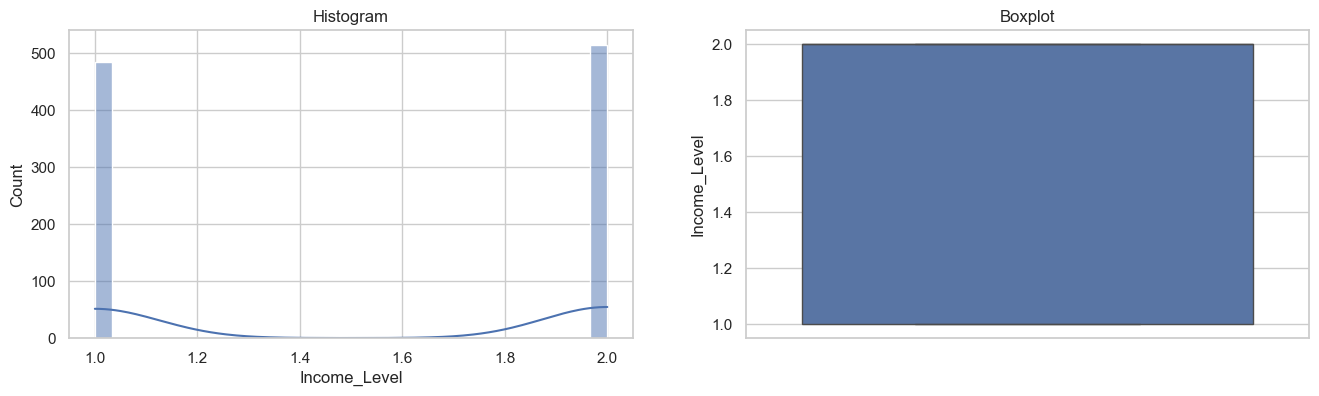

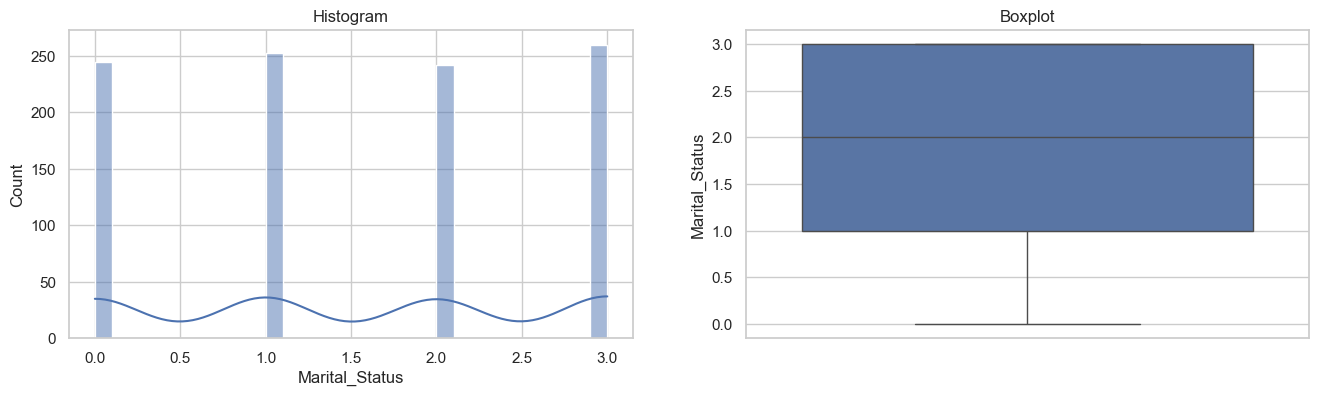

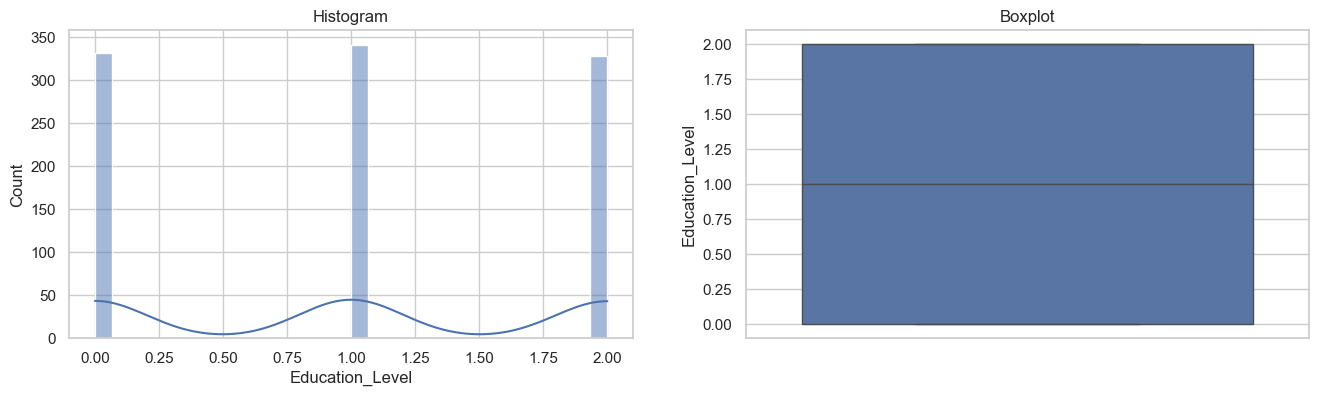

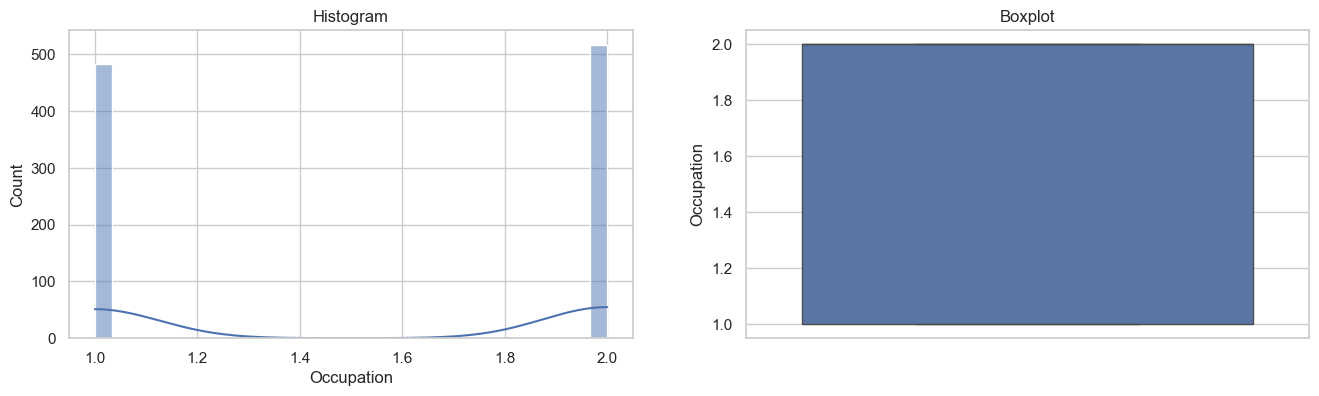

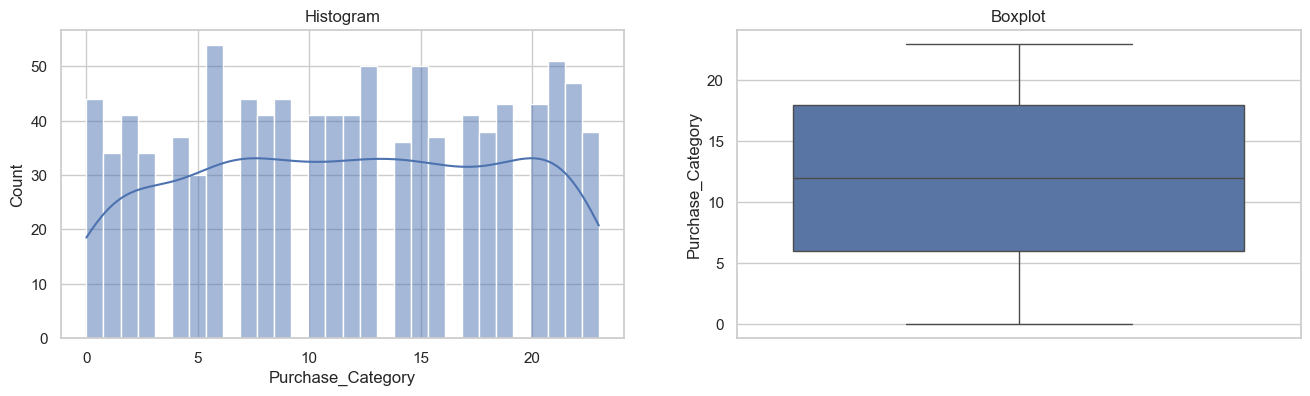

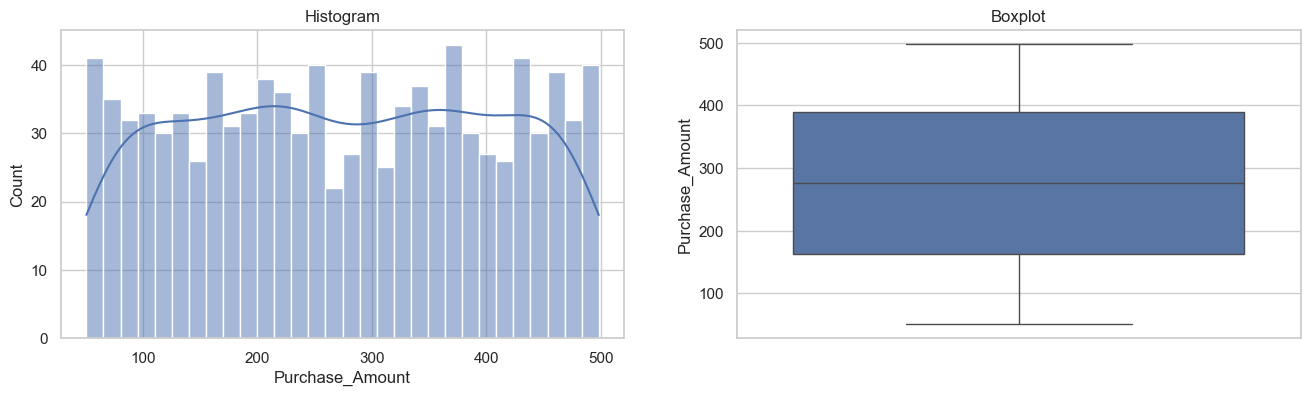

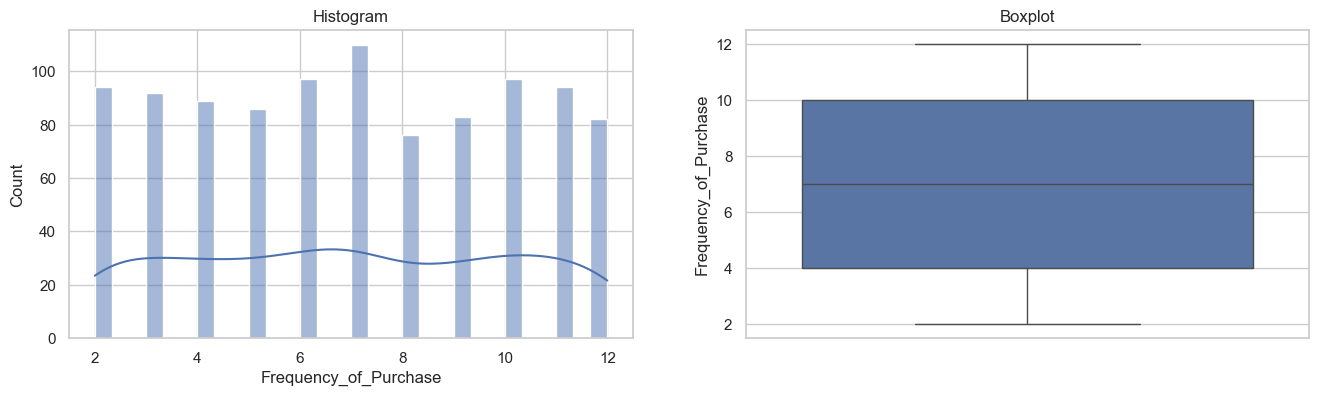

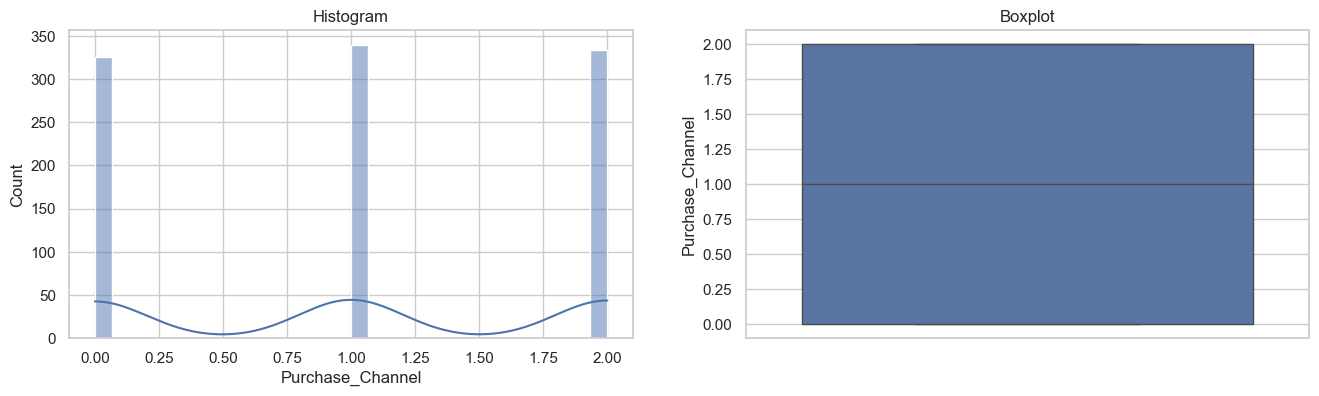

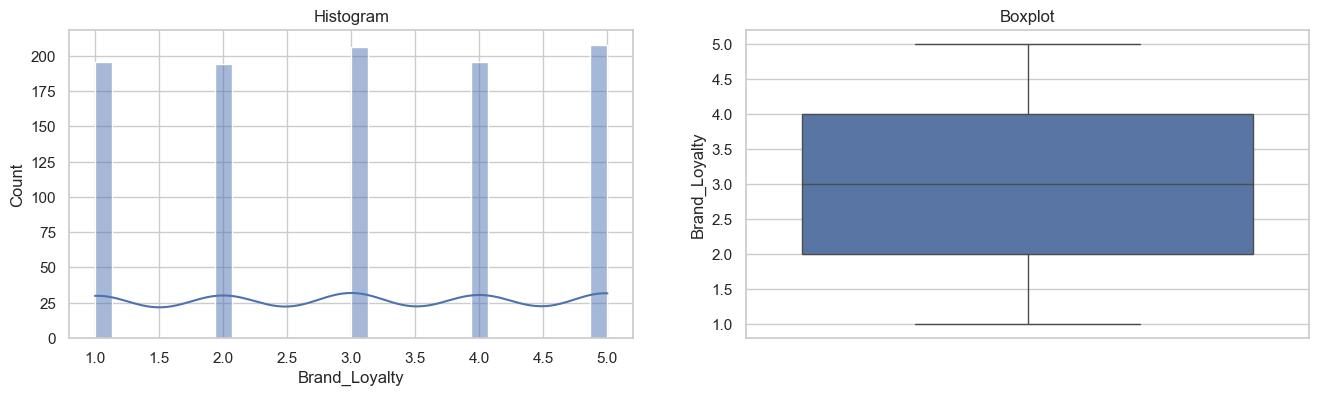

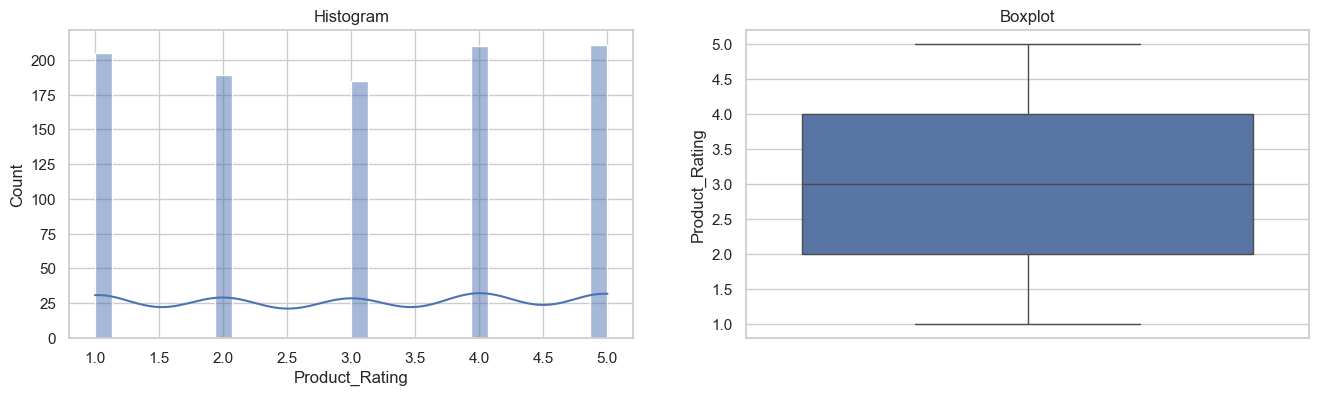

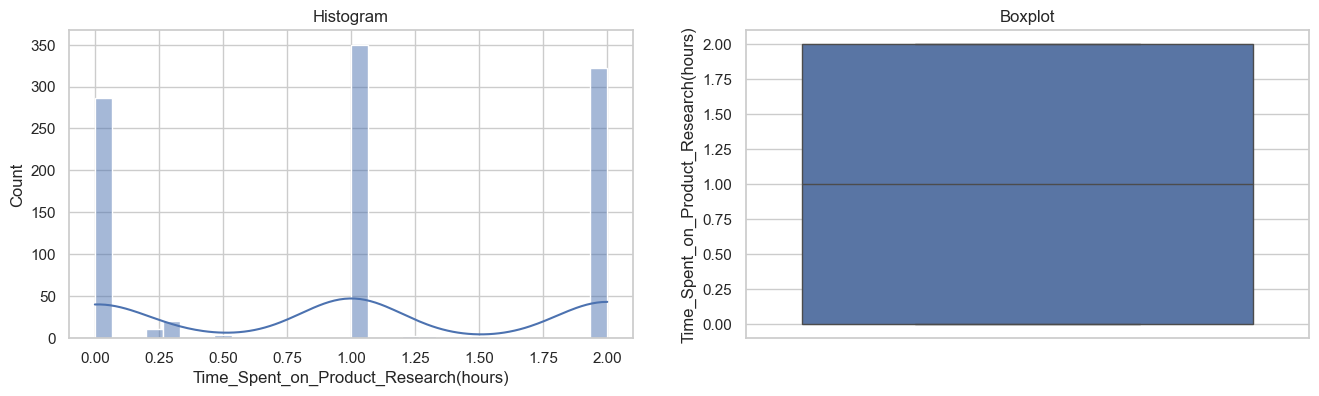

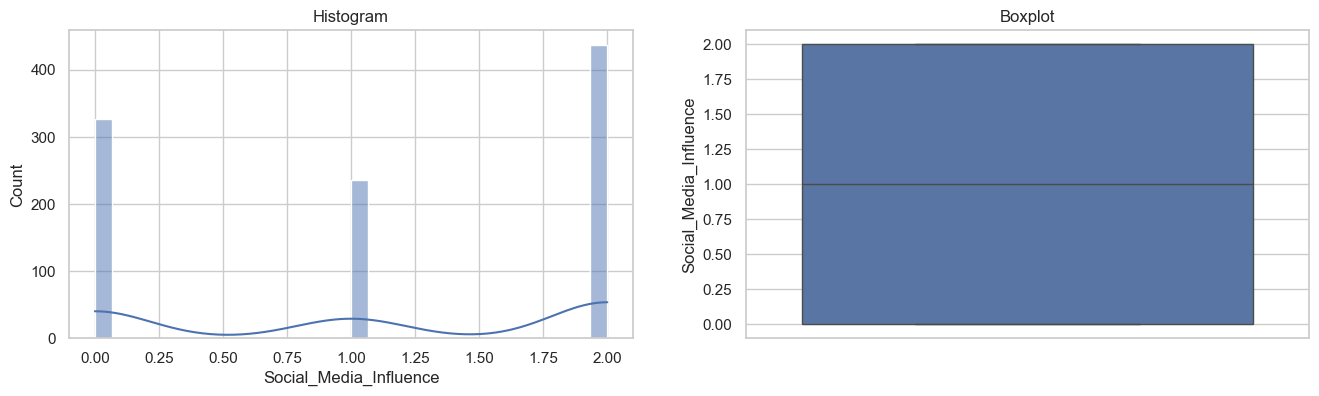

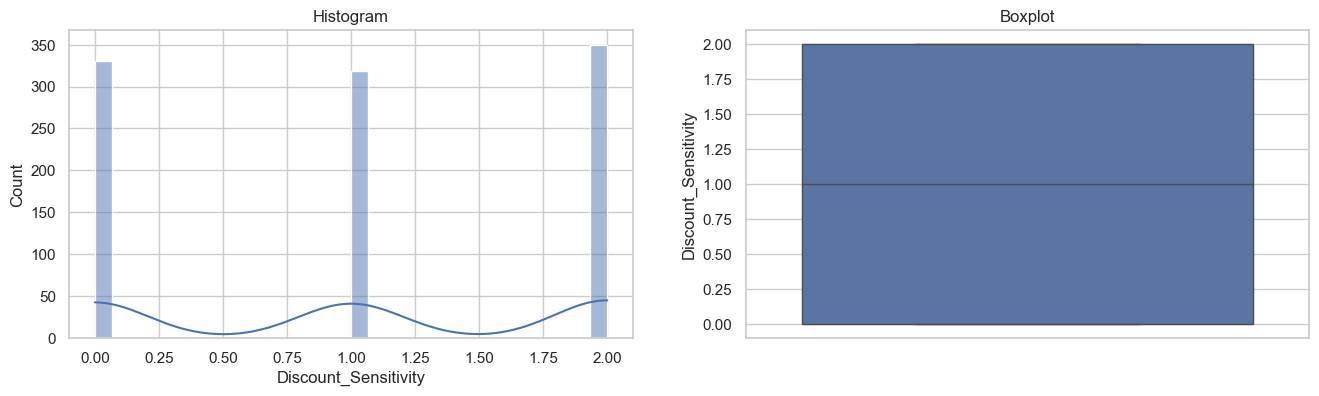

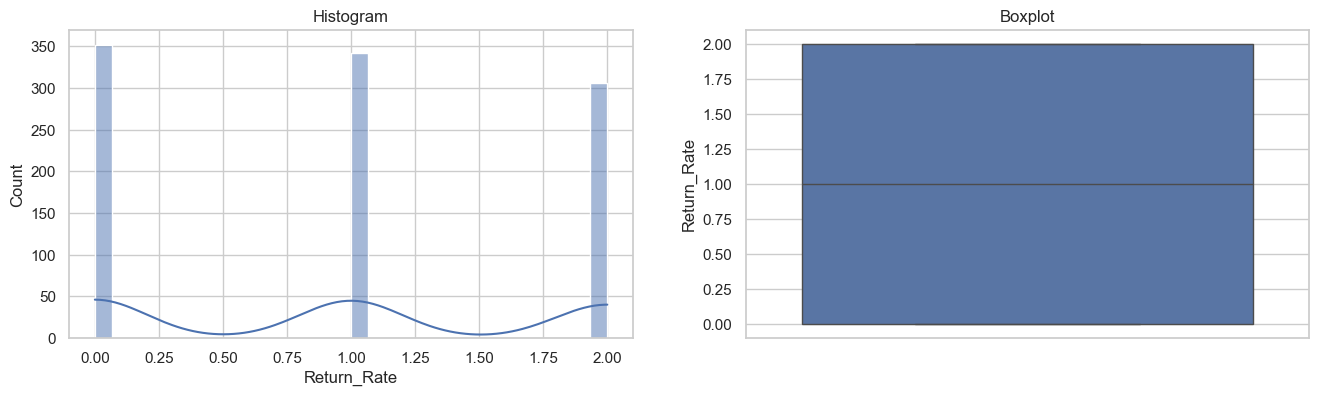

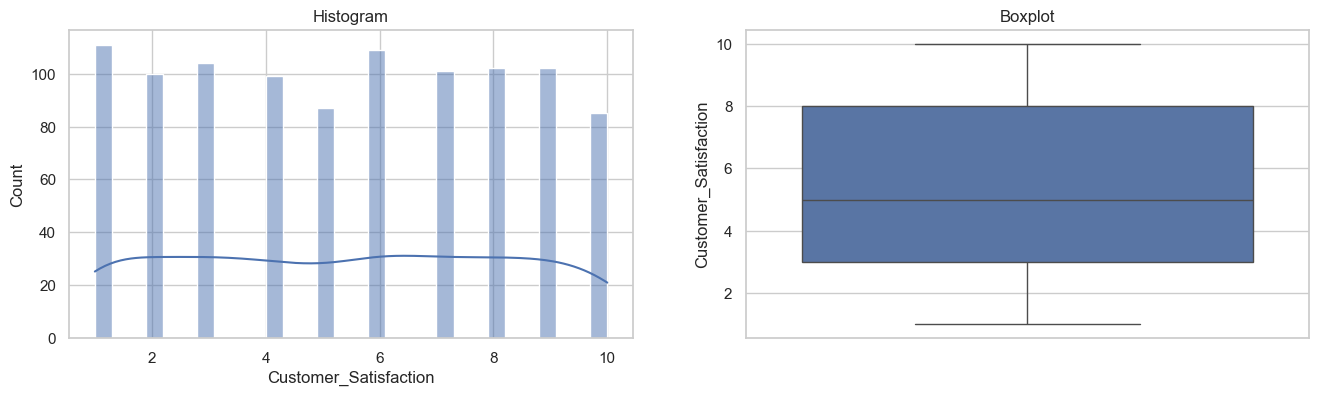

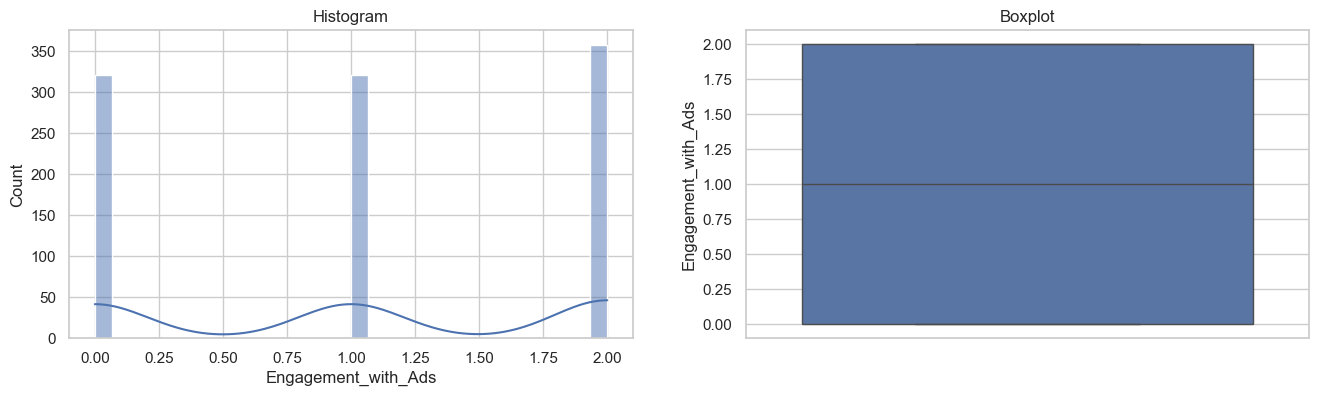

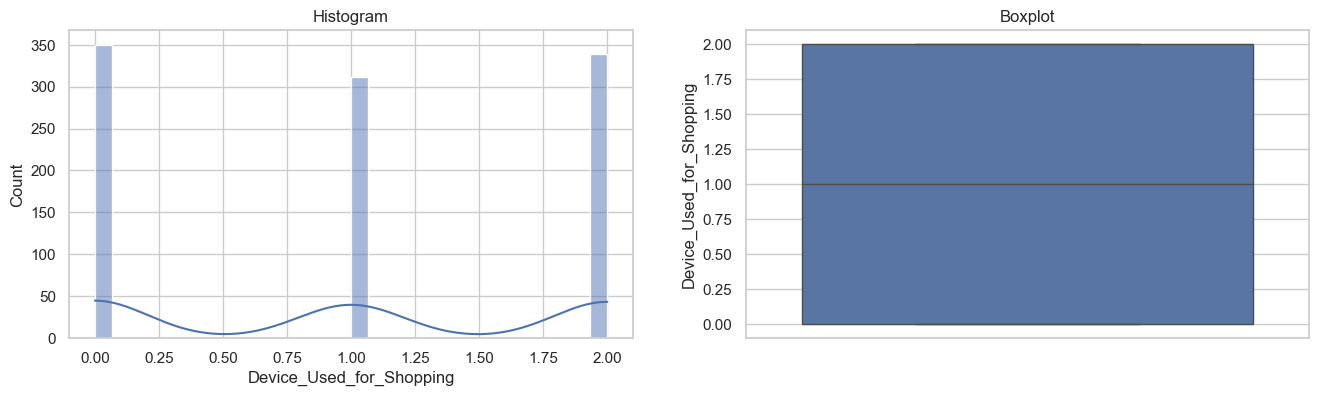

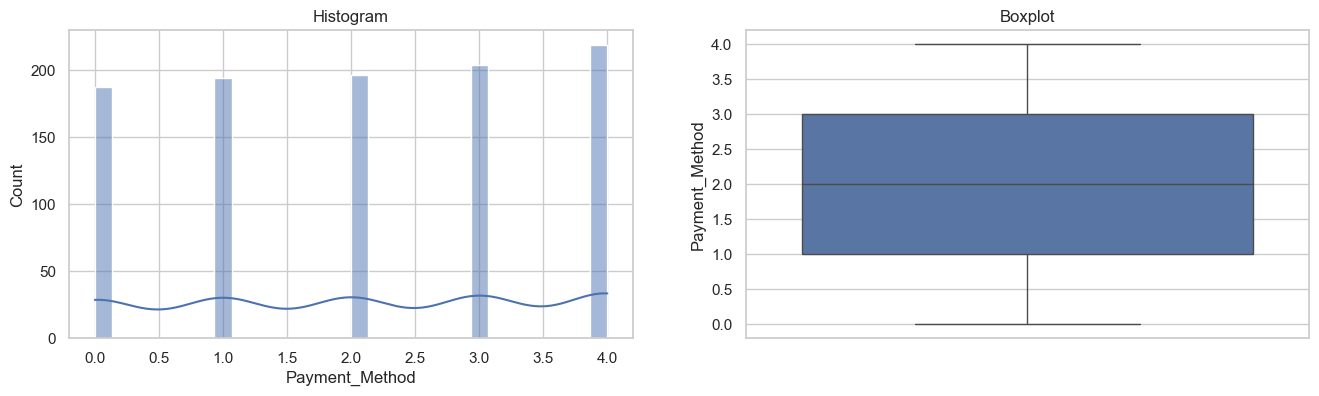

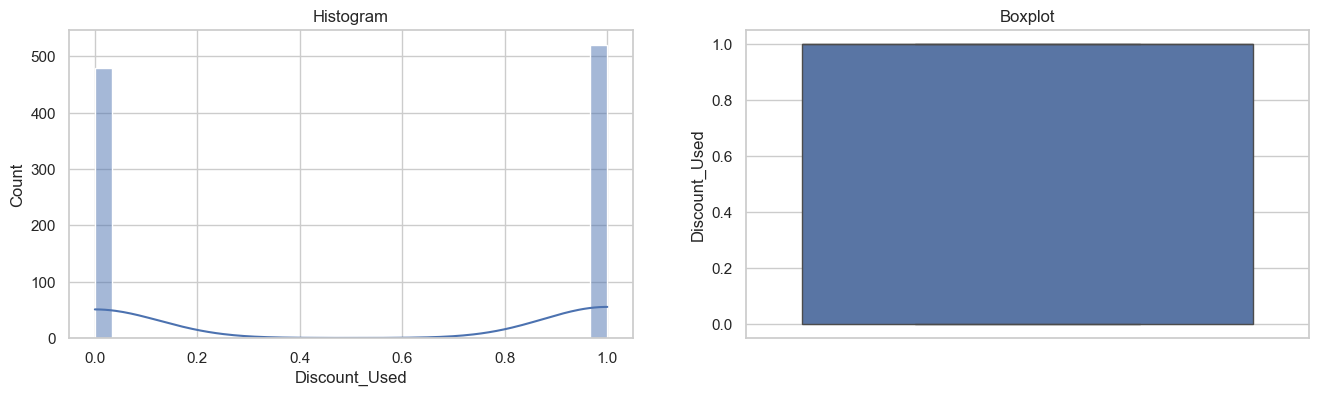

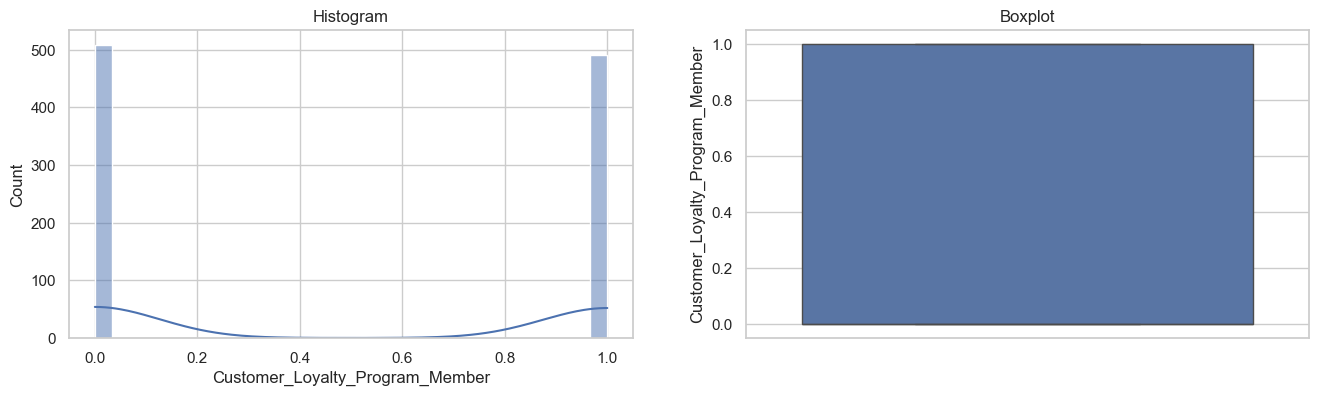

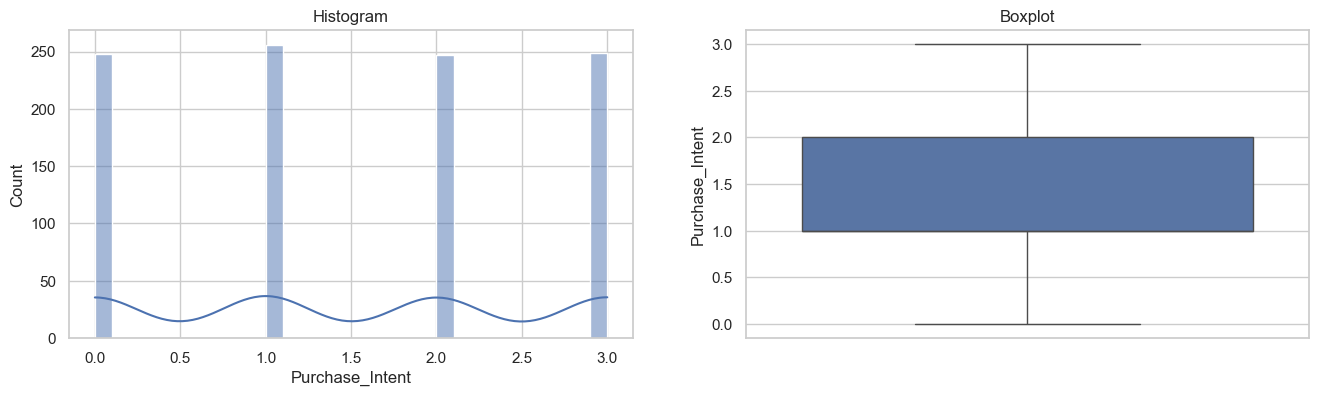

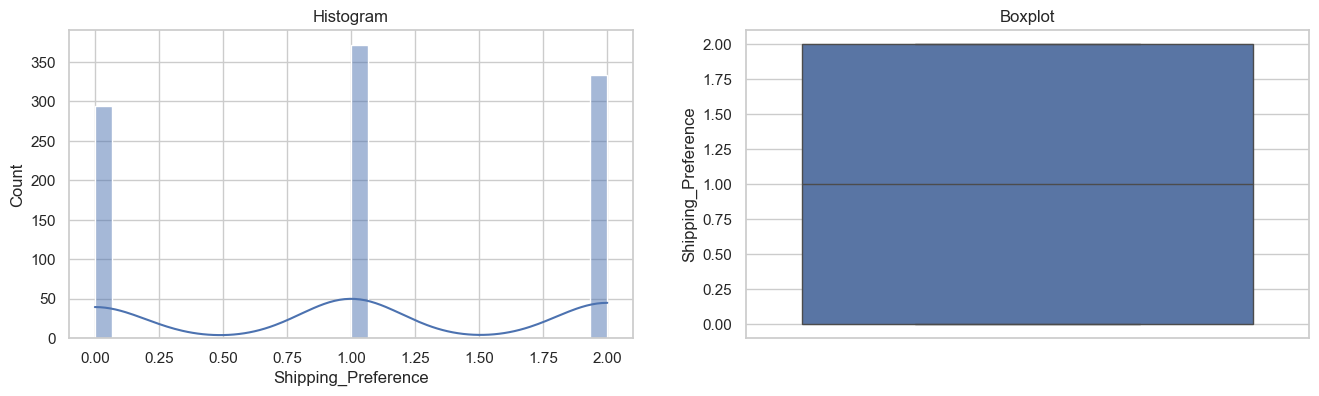

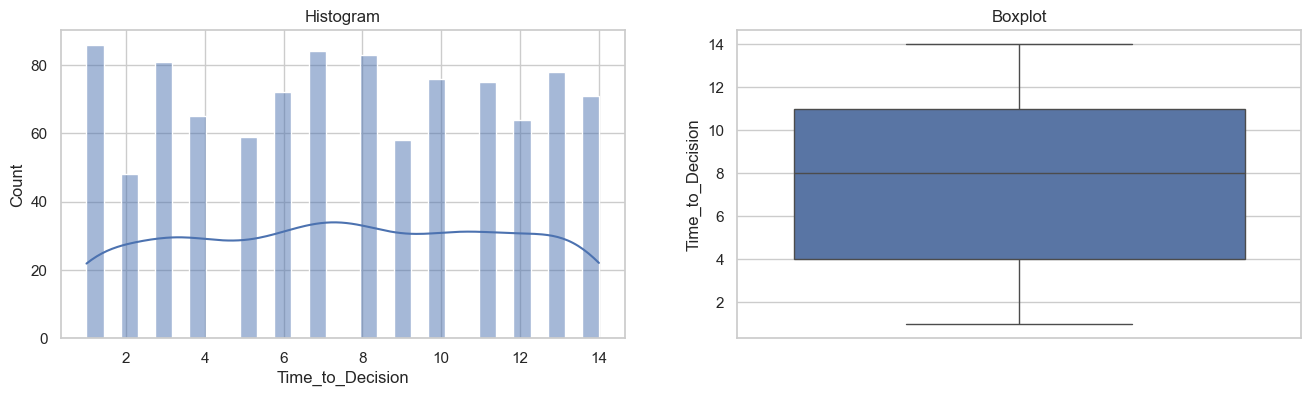

In [ ]:
cols = [
    'Age', 'Gender', 'Income_Level', 'Marital_Status', 'Education_Level',
    'Occupation', 'Purchase_Category', 'Purchase_Amount', 'Frequency_of_Purchase',
    'Purchase_Channel', 'Brand_Loyalty', 'Product_Rating', 
    'Time_Spent_on_Product_Research(hours)', 'Social_Media_Influence',
    'Discount_Sensitivity', 'Return_Rate', 'Customer_Satisfaction',
    'Engagement_with_Ads', 'Device_Used_for_Shopping', 'Payment_Method',
    'Discount_Used', 'Customer_Loyalty_Program_Member', 'Purchase_Intent',
    'Shipping_Preference', 'Time_to_Decision'
]

# iterasi semua kolom
for col in cols:
    check_plot(df, col)

# **Modeling**

In [142]:
probit_model = sm.Probit(y, X_scaled)
result=probit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.674814
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:          Discount_Used   No. Observations:                 1000
Model:                         Probit   Df Residuals:                      976
Method:                           MLE   Df Model:                           23
Date:                Tue, 07 Oct 2025   Pseudo R-squ.:                 0.02521
Time:                        13:40:55   Log-Likelihood:                -674.81
converged:                       True   LL-Null:                       -692.26
Covariance Type:            nonrobust   LLR p-value:                   0.05320
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Age                                       0.0254      

## **Filter Variabel yang Berpengaruh terhadap Penggunaan Discount Oleh Customer**

In [143]:
coef_table = result.summary2().tables[1].reset_index()
coef_table.columns = ['Variable', 'Coef', 'Std.Err', 'z', 'P>|z|', '[0.025', '0.975]']

# Filter variabel berpengaruh (p < 0.05)
sig_vars = coef_table[coef_table['P>|z|'] < 0.05]
sig_vars


,Variable,Coef,Std.Err,z,P>|z|,[0.025,0.975]
4,Education_Level,0.203945,0.097543,2.090819,0.036544,0.012764,0.395125
10,Brand_Loyalty,-0.240375,0.111048,-2.164610,0.030418,-0.458024,-0.022725
11,Product_Rating,-0.275928,0.109712,-2.515011,0.011903,-0.490960,-0.060895
18,Device_Used_for_Shopping,0.233239,0.105412,2.212647,0.026922,0.026636,0.439843
19,Payment_Method,0.302177,0.112473,2.686668,0.007217,0.081734,0.522619


# **Marginal Effects**

In [144]:
marginal_effects = result.get_margeff()
print(marginal_effects.summary())

       Probit Marginal Effects       
Dep. Variable:          Discount_Used
Method:                          dydx
At:                           overall
                                           dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Age                                       0.0098      0.051      0.191      0.848      -0.091       0.111
Gender                                   -0.0098      0.047     -0.206      0.837      -0.103       0.083
Income_Level                             -0.0571      0.031     -1.858      0.063      -0.117       0.003
Marital_Status                            0.0149      0.041      0.367      0.714      -0.065       0.094
Education_Level                           0.0790      0.038      2.105      0.035       0.005       0.153
Occupation                               -0.0248      0.031     -0.795      0.427      -0.086       0.036


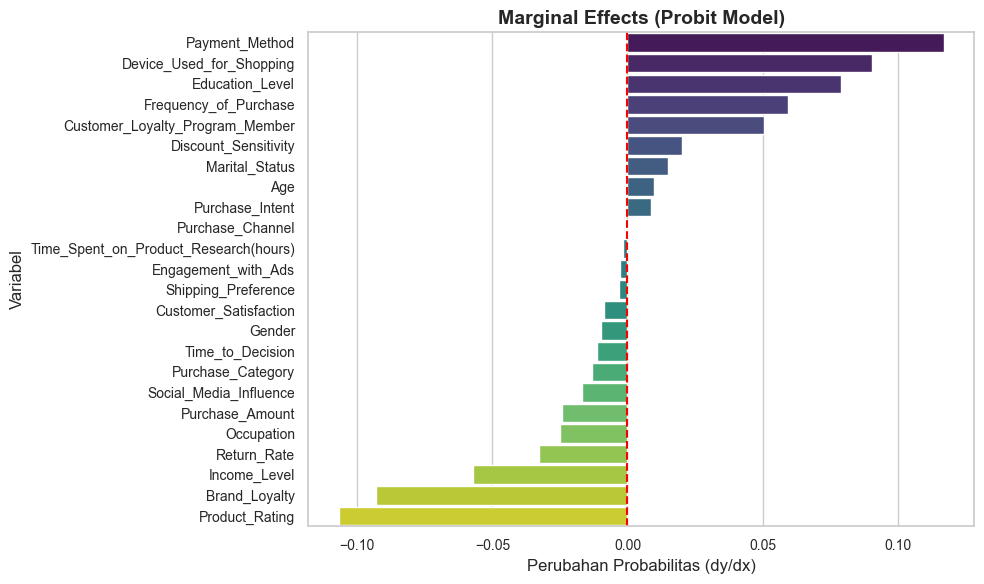

In [151]:
marginal_df = marginal_effects.summary_frame().sort_values(by='dy/dx', ascending=False)

# Plot
plt.figure(figsize=(10, 6)) 
sns.barplot(
    x='dy/dx',
    y=marginal_df.index,
    data=marginal_df,
    palette='viridis',
    width=0.9 
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Marginal Effects (Probit Model)', fontsize=14, weight='bold')
plt.xlabel('Perubahan Probabilitas (dy/dx)', fontsize=12)
plt.ylabel('Variabel', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# **Cek Multikolinearitas**

In [152]:
X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print(vif_data)


                                 Variable        VIF
0                                   const  89.685366
1                                     Age   1.016096
2                                  Gender   1.012936
3                            Income_Level   1.022512
4                          Marital_Status   1.013201
5                         Education_Level   1.017998
6                              Occupation   1.035802
7                       Purchase_Category   1.039428
8                         Purchase_Amount   1.038464
9                   Frequency_of_Purchase   1.018506
10                       Purchase_Channel   1.020593
11                          Brand_Loyalty   1.022461
12                         Product_Rating   1.025410
13  Time_Spent_on_Product_Research(hours)   1.018591
14                 Social_Media_Influence   1.124449
15                   Discount_Sensitivity   1.021896
16                            Return_Rate   1.021679
17                  Customer_Satisfaction   1.